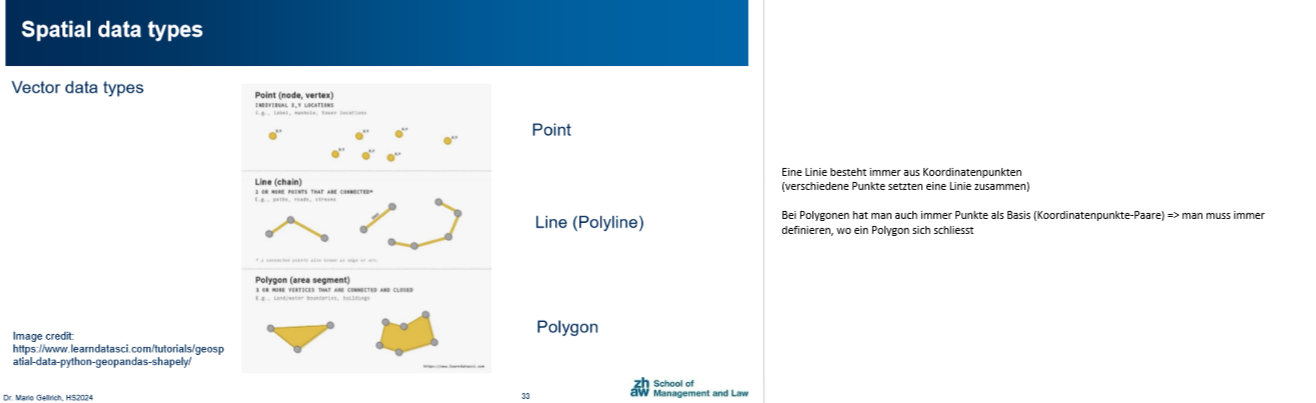

# Einführung in PostgreSQL, PostGIS und Geodaten

## 1. PostgreSQL und PostGIS
PostgreSQL ist ein leistungsstarkes Open-Source-Datenbankverwaltungssystem, das für relationale Daten verwendet wird. PostGIS ist eine Erweiterung für PostgreSQL, die Unterstützung für geografische Daten und Geodatenanalyse hinzufügt. Diese Erweiterung ermöglicht es, geografische Objekte wie Punkte, Linien und Polygone in einer Datenbank zu speichern und abzufragen.

### 1.1 Wichtige Konzepte in PostGIS
PostGIS erweitert SQL um Funktionen zur räumlichen Analyse. Dies ist besonders nützlich, wenn du mit geografischen Daten arbeitest. Wichtige räumliche Funktionen sind:
- **ST_Transform:** Konvertiert die Projektion von Geodaten in ein anderes Koordinatensystem.
- **ST_SetSRID:** Weist Geodaten eine spezifische Raumbezugskennung (Spatial Reference ID, SRID) zu, z. B. EPSG:4326 (WGS84).
- **ST_DWithin:** Prüft, ob zwei geografische Objekte innerhalb einer bestimmten Entfernung voneinander liegen.
- **ST_Distance:** Berechnet die Entfernung zwischen zwei Geometrien.
- **ST_Buffer:** Erstellt eine Pufferzone um eine Geometrie, z. B. 1000 Meter um eine Straße herum.
- **ST_MakePoint:** Erstellt einen Punkt aus den gegebenen Längen- und Breitengraden.

## 2. Geografische Datentypen in PostGIS

### 2.1 Geografische Objekte
PostGIS unterstützt verschiedene geometrische Objekte, die verwendet werden, um reale geografische Merkmale zu modellieren. Hier sind die wichtigsten Typen:
- **Point (Punkt):** Wird verwendet, um einen bestimmten Standort in Form von Koordinaten zu repräsentieren. Beispiel: Ein Geschäft oder eine Haltestelle.
- **LineString (Linie):** Repräsentiert eine Linie, die durch mehrere Punkte definiert ist. Beispiel: Straßen oder Flüsse.
- **Polygon:** Repräsentiert eine geschlossene Fläche, die von mehreren Linien umschlossen wird. Beispiel: Ein Gebäude oder ein Stadtgebiet.

### 2.2 Geografische Koordinatensysteme (CRS)
Ein Koordinatensystem bestimmt, wie die Geometrien auf der Erde abgebildet werden. Eines der bekanntesten Koordinatensysteme ist **EPSG:4326** (auch bekannt als WGS84), welches verwendet wird, um Geodaten in Form von Längen- und Breitengraden darzustellen.

### 2.3 Projektionen und Transformationsfunktionen
Geografische Daten können in verschiedenen Koordinatensystemen vorliegen. Um eine konsistente Analyse durchzuführen, müssen die Daten oft in dasselbe Koordinatensystem transformiert werden:
- **ST_Transform:** Wandelt die Geometrie eines Objekts in ein anderes Koordinatensystem um. Zum Beispiel wird oft das **EPSG:4326**-Koordinatensystem (WGS84) verwendet, um Geometrien für globale Koordinaten zu definieren.

## 3. Nutzung von GeoDataFrames in Python
In Python können geografische Daten in Form von **GeoDataFrames** mit der Bibliothek `geopandas` verarbeitet werden. Ein **GeoDataFrame** funktioniert ähnlich wie ein Pandas DataFrame, aber es unterstützt zusätzliche räumliche Operationen und speichert Geometrien.
- Ein GeoDataFrame wird oft verwendet, um das Ergebnis einer räumlichen SQL-Abfrage (z. B. mit PostGIS) zu speichern.
- Die Geometrie-Spalte eines GeoDataFrames enthält die räumlichen Informationen, wie Punkte, Linien oder Polygone.

## 4. Beispiel für räumliche SQL-Abfragen
Mit PostGIS kannst du SQL-Abfragen erstellen, die geografische Objekte abfragen, filtern oder transformieren:
- Beispiel einer Abfrage, um alle Gebäude in bestimmten Postleitzahlgebieten auszuwählen:
  ```sql
  SELECT 
      osm_id, 
      "addr:street", 
      "addr:housenumber", 
      "addr:city", 
      "addr:postcode", 
      building, 
      ST_Transform(way, 4326) AS geom
  FROM 
      planet_osm_polygon
  WHERE 
      "addr:postcode" IN ('8001', '8002');
- In dieser Abfrage wird die ST_Transform-Funktion verwendet, um die Koordinaten des Gebäudes in das EPSG:4326 Koordinatensystem zu transformieren.

### Darstellung von Geodaten auf einer Karte

Mit Python und der folium-Bibliothek kannst du geografische Daten auf interaktiven Karten darstellen. folium ermöglicht es, eine GeoJSON-Repräsentation von Geodaten zu rendern und diese auf einer Karte anzuzeigen.

#### 5.1 Beispiel für die Visualisierung von Gebäuden

Mit der Bibliothek folium kannst du die Gebäude auf einer Karte anzeigen, die du vorher aus der Datenbank abgefragt hast:

```sql
# Initialisierung der Karte
m = folium.Map(location=[lat, lon], zoom_start=15, tiles='EsriWorldImagery')

# Hinzufügen der GeoJSON-Daten zur Karte
folium.GeoJson(
    gdf,
    name='geojson',
    popup=folium.GeoJsonPopup(fields=['addr:street', 'addr:housenumber', 'addr:city', 'addr:postcode', 'building'])
).add_to(m)

# Hinzufügen der Layer-Kontrolle
folium.LayerControl().add_to(m)

# Karte anzeigen
m
```

## Kartenübersicht für `folium`

1. **EsriWorldImagery**
   - Diese Karte zeigt **Satellitenbilder** der Erde. Sie bietet hochauflösende Luftaufnahmen, die ideal für visuelle Analysen von Landschaften, Städten oder Infrastruktur sind. Sie wird oft verwendet, um aktuelle Satellitenansichten von Gebieten anzuzeigen.

2. **EsriWorldTopoMap**
   - Eine **topografische Karte** mit Details zur Geländestruktur, einschließlich Höhenlinien, Vegetationsbedeckung, Straßen, Grenzen und Stadtplänen. Diese Karte ist nützlich für Wanderungen, Planungen oder geografische Untersuchungen.

3. **EsriWorldGrayCanvas**
   - Eine **graustufige Karte**, die wenig Ablenkung durch Farben bietet und ideal für die **Darstellung von Daten** in farbigen Layern ist. Sie wird oft verwendet, um Datenelemente hervorzuheben und den Kartenhintergrund in den Hintergrund treten zu lassen.

4. **CartoDBDarkMatter**
   - Diese Karte bietet einen **dunklen Hintergrund** mit scharfen, kontrastreichen Linien und Texten. Sie eignet sich besonders gut für die Darstellung von **nachtbasierten oder farbenintensiven Datenvisualisierungen**.

5. **CartoDBPositron**
   - Eine **hellfarbene, minimalistische Karte**, die ähnlich wie EsriWorldGrayCanvas Daten in den Vordergrund stellt, ohne von vielen Details auf der Karte abzulenken. Ideal für **Präsentationen und Datenvisualisierungen**, bei denen die Karte den Kontext bieten, aber nicht dominieren soll.


Beliebte OSM Map Features:

1.  Shop-Typen:
    - shop = 'supermarket': Supermärkte
    - shop = 'bakery': Bäckereien
    - shop = 'clothes': Bekleidungsgeschäfte
    - shop = 'chemist': Apotheken

###### Aufgabe 1: Finde alle Supermärkte in Zürich

        ```sql
        SELECT
            p.osm_id,
            p.shop,
            p.name,
            ST_Transform(p.way, 4326) AS geom
        FROM
            planet_osm_point AS p
        WHERE
            p.shop = 'supermarket';
        ```

2.  Amenity (Einrichtungen):
    - amenity = 'restaurant': Restaurants
    - amenity = 'school': Schulen
    - amenity = 'hospital': Krankenhäuser
    - amenity = 'bank': Banken

###### Aufgabe 2: Finde alle Restaurants in Zürich

        ```sql
        SELECT
            p.osm_id,
            p.amenity,
            p.name,
            ST_Transform(p.way, 4326) AS geom
        FROM
            planet_osm_point AS p
        WHERE
            p.amenity = 'restaurant';
        ```

3. Verkehr:
    - highway = 'motorway': Autobahnen
    - highway = 'primary': Hauptstraßen
    - railway = 'station': Bahnhöfe
    - railway = 'tram_stop': Straßenbahnhaltestellen

###### Aufgabe 3: Finde alle Bahnhöfe in Zürich

        ```sql
        SELECT
            p.osm_id,
            p.railway,
            p.name,
            ST_Transform(p.way, 4326) AS geom
        FROM
            planet_osm_point AS p
        WHERE
            p.railway = 'station';
        ```

4. Wasserwege:
    - waterway = 'river': Flüsse
    - waterway = 'stream': Bäche

###### Aufgabe 4: Finde alle Flüsse in der Schweiz

        ```sql
        SELECT
            p.osm_id,
            p.waterway,
            ST_Transform(p.way, 4326) AS geom
        FROM
            planet_osm_line AS p
        WHERE
            p.waterway = 'river';

        ```

######  Aufgabe 5: Finde alle Autobahnen in Zürich und erstelle einen 5000 Meter Puffer um sie herum

        ```sql
        SELECT
            1 as group_id,
            ST_Transform(ST_UNION(ST_Buffer(p.way::geometry, 5000)), 4326) AS geom
        FROM
            planet_osm_roads AS p
        WHERE
            p.highway = 'motorway';
        ```